### 1. Import the Library and read the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder


In [2]:
selected_features = ["TP2", "H1", "DV_pressure", "Reservoirs", "Oil_temperature", "Motor_current", "Oil_level", 'status']

In [3]:
data = pd.read_csv("Clean_Data.csv")
data.head()

,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,status
0,562564,2020-04-18 00:00:01,-0.018,8.248,8.238,-0.024,8.248,49.45,0.04,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1
1,562565,2020-04-18 00:00:13,-0.018,8.248,8.238,-0.024,8.248,49.45,0.04,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1
2,562566,2020-04-18 00:00:24,-0.018,8.248,8.238,-0.024,8.248,49.45,0.04,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1
3,562567,2020-04-18 00:00:36,-0.018,8.248,8.238,-0.024,8.248,49.45,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,562568,2020-04-18 00:00:49,-0.018,8.248,8.238,-0.024,8.248,49.45,0.04,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1


In [4]:
#Shuffle the data
data = data.sample(frac = 1)
data.head()

,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,status
54184,634910,2020-04-29 09:35:44,-0.016,9.056,9.046,-0.024,9.056,55.325,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
14757,894550,2020-06-05 20:17:58,8.370,8.204,-0.008,2.226,8.206,75.225,5.5375,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1
16124,895917,2020-06-06 00:03:48,6.234,8.188,-0.008,1.516,8.188,75.525,5.0400,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1
20113,899906,2020-06-06 11:02:49,6.792,8.160,-0.006,1.702,8.162,75.975,5.2275,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1
29099,1171982,2020-07-15 16:56:53,8.088,7.672,-0.002,-0.006,7.668,84.775,5.4900,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1


### 2. XGBOOST

- XGBoost, a Gradient Boosted decision tree implementation, excels in Kaggle Competitions.
- It sequentially creates decision trees, assigning weights to variables that are adjusted based on prediction errors.
- This ensemble method, with optimizations like the Approximate Greedy Algorithm and Cash-Aware Access, proves effective for regression, classification, ranking, and user-defined prediction problems.

reference: <BR>
https://xgboost.readthedocs.io/en/stable/python/python_intro.html <BR>
https://www.geeksforgeeks.org/xgboost/ <BR>
https://www.geeksforgeeks.org/ml-xgboost-extreme-gradient-boosting/ <BR>

In [5]:
#!pip install xgboost
import xgboost as xgb

In [6]:
X = data[selected_features]
y = data['status']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
class XGBoost():
  def __init__(self):
    self._model = xgb.XGBClassifier()
    self._encoder = OneHotEncoder(categories='auto')

  def fit(self, x, y):
    # Fit the encoder on training labels
    y = np.array(y)
    self._encoder.fit(y[:, np.newaxis])
    self._model.fit(x, y)

  def predict(self, x):
    y_pred = self._model.predict(x)
    return self._encoder.transform(y_pred[:, np.newaxis]).toarray()


In [9]:
# Fitting XGBoost to the training data
model = XGBoost()
model.fit(X_train, y_train)

In [10]:
# Predicting the Test set results
y_pred = model.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6088
           1       1.00      1.00      1.00      5801

    accuracy                           1.00     11889
   macro avg       1.00      1.00      1.00     11889
weighted avg       1.00      1.00      1.00     11889



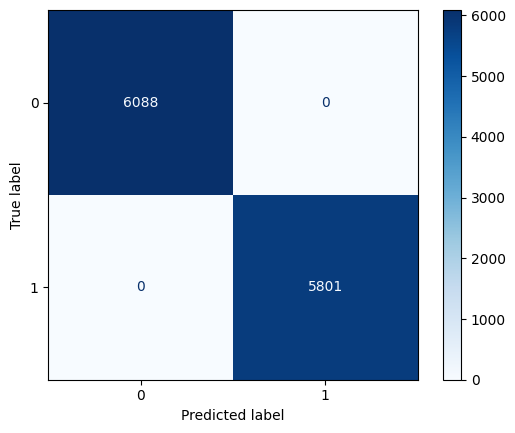

In [11]:
y_pred = np.argmax(y_pred, axis = 1)
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

disp = ConfusionMatrixDisplay(cm, display_labels=['0', '1'])
disp.plot(cmap='Blues', values_format='d')
plt.show()

### 3. Extreme Learning Machine

* Extreme Learning Machine is a variation of Feed forward neural network with just 1 hidden layer.
* Extreme Machine Learning does not use iterative method such as gradient descent to tuning the weights, instead it use linear algebra to solve for the optimal solution.
* Extreme Machine Learning is believed to be able to approximate any abitrary function given sufficient number of hidden units and data to learn.

In [12]:
import pandas as pd
import numpy as np
from timeit import timeit as time
import cupy as cp
from  cupy.linalg import pinv as pinv2

import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [13]:
selected_features = ["TP2", "H1", "DV_pressure", "Reservoirs", "Oil_temperature", "Motor_current", "Oil_level", 'status']

In [14]:
data = pd.read_csv("Clean_Data.csv")
data.head()

,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,status
0,562564,2020-04-18 00:00:01,-0.018,8.248,8.238,-0.024,8.248,49.45,0.04,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1
1,562565,2020-04-18 00:00:13,-0.018,8.248,8.238,-0.024,8.248,49.45,0.04,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1
2,562566,2020-04-18 00:00:24,-0.018,8.248,8.238,-0.024,8.248,49.45,0.04,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1
3,562567,2020-04-18 00:00:36,-0.018,8.248,8.238,-0.024,8.248,49.45,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,562568,2020-04-18 00:00:49,-0.018,8.248,8.238,-0.024,8.248,49.45,0.04,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1


In [15]:
# Choose only features selected from Question 2
#Shuffle the data
data = data.sample(frac = 1)
data.head()

,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,status
48451,232935,2020-03-03 12:59:15,8.738,8.288,-0.022,-0.026,8.284,60.875,5.7175,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0
35205,1385961,2020-08-13 11:22:43,-0.010,9.360,9.344,-0.018,9.360,68.775,3.7250,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0
54210,1000289,2020-06-20 06:51:31,-0.018,9.924,9.914,-0.022,9.920,71.725,3.8500,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
54779,1106122,2020-07-04 20:01:51,-0.010,8.566,8.552,-0.018,8.566,61.950,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
15738,895531,2020-06-05 23:00:02,8.338,8.162,-0.008,2.214,8.162,75.525,5.6175,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1


In [16]:
X = data[selected_features]
y = data['status']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
#this Extreme Machine Learning class is implemented specificly to work on GPU
#this will not run on a CPU machine

class ExtremeLearningMachine():
  def __init__(self, hidden_size = 10, threshold = 0.5):
    self._hidden_size = hidden_size
    self._input_size  = None
    self._w = None
    self._b = None
    self._beta = None
    self._threshold = 0.5
    self._encoder = OneHotEncoder(categories='auto')
    self._scaler  = StandardScaler()

  def encode(self, y):
    y = np.array(y)
    return self._encoder.fit_transform(y[:, np.newaxis]).toarray()

  def scale(self,x):
    return self._scaler.transform(x)

  def _h(self,x):
    return self._tanh(cp.dot(x, self._w) + self._b )

  @property
  def hidden_size(self):
    return self._hidden_size

  @staticmethod
  def _tanh(x):
    return cp.tanh(x)

  def fit(self, x, y):
    x = self._scaler.fit_transform(x)
    y = np.array(y)
    y = self._encoder.fit_transform(y[:, np.newaxis]).toarray()

    x_gpu = cp.asarray(x)
    y_gpu = cp.asarray(y)

    self._input_size = x.shape[1]
    self._w = cp.random.normal( size = [self._input_size, self._hidden_size])
    self._b = cp.random.normal(size = [self._hidden_size])

    H = self._h(x_gpu)
    self._beta = cp.dot(pinv2(H), y_gpu)

    del x_gpu
    del y_gpu
    cp._default_memory_pool.free_all_blocks()


  def predict(self, x):
    x = self.scale(x)
    x_gpu = cp.asarray(x)
    out_gpu = cp.dot(self._h(x_gpu), self._beta)
    out = cp.asnumpy(out_gpu)
    del out_gpu
    cp._default_memory_pool.free_all_blocks()
    return out

In [19]:
num_hidden = [5,10,20,30,40,50,60,70]
scores = []

for h in num_hidden:
  elm = ExtremeLearningMachine(h)
  elm.fit(X_train, y_train)
  y_pred = elm.predict(X_test)
  y_pred = np.argmax(y_pred, axis = 1)
  scores.append(accuracy_score(y_test, y_pred))
  #Clear GPU memmory
  del elm
  cp._default_memory_pool.free_all_blocks()

In [20]:
best_hidden_size_indx = np.argmax(scores)
best_hidden_size = num_hidden[best_hidden_size_indx]
best_score       = scores[best_hidden_size_indx]

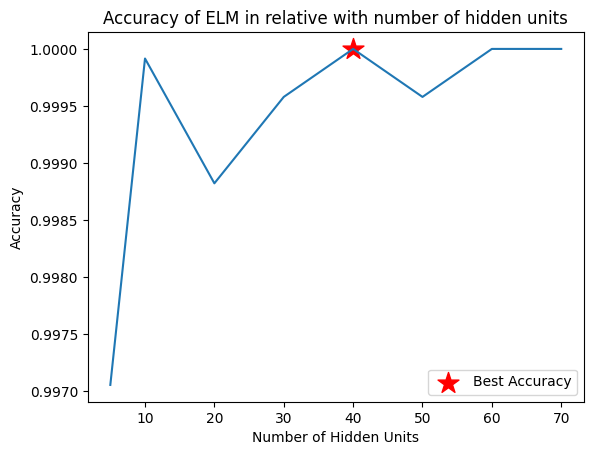

In [21]:
plt.plot(num_hidden, scores)
plt.scatter(best_hidden_size, best_score, s = 250, marker = "*", color = 'r' , label = 'Best Accuracy')
plt.xlabel('Number of Hidden Units')
plt.ylabel('Accuracy')
plt.title('Accuracy of ELM in relative with number of hidden units' )
plt.legend()
plt.show()

In [22]:
elm = ExtremeLearningMachine(best_hidden_size)
elm.fit(X_train, y_train)

In [23]:
y_pred = elm.predict(X_test)

Best result achieved with 40 hidden units
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5954
           1       1.00      1.00      1.00      5935

    accuracy                           1.00     11889
   macro avg       1.00      1.00      1.00     11889
weighted avg       1.00      1.00      1.00     11889



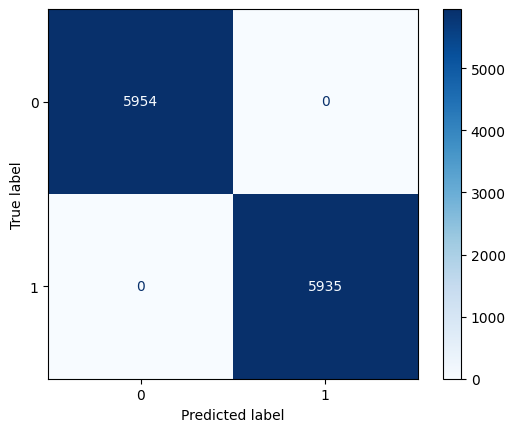

In [24]:
y_pred = np.argmax(y_pred, axis = 1)

print(f'Best result achieved with {elm.hidden_size} hidden units')
print(classification_report(y_test, y_pred))
c_mat  = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(c_mat, display_labels=['0', '1'])
disp.plot(cmap='Blues', values_format='d')
plt.show()

### 4. Neural Network with 2 hidden layers

**About the Model :**
The neural network model created for this metro dataset consists of two hidden layers, each with 64 neurons, designed to capture complex patterns and relationships within the data. By utilizing a deep learning approach, the model aims to accurately predict the 'status' variable, effectively handling the non-linear and intricate dependencies likely present in the diverse range of features from the metro operational metrics.

**Why TensorFlow and Keras?**

Handling Large and Complex Datasets: since metro dataset is large or complex, TensorFlow and Keras can efficiently handle such datasets. Deep learning models, particularly those built with these frameworks, are known for their ability to process and extract patterns from large volumes of data.

Feature Learning: Deep learning models have the capability to automatically learn and extract features from raw data. This can be particularly useful since dataset contains complex patterns or relationships that are not easily captured with traditional machine learning models.

Non-linear Relationships: Neural networks, which can be easily built using TensorFlow and Keras, are adept at capturing non-linear relationships in the data. The metro dataset has intricate dependencies between variables, a neural network might model these relationships more effectively than a simpler linear model.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, confusion_matrix, roc_curve, auc

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [26]:
# Read the dataset
data = pd.read_csv('Clean_Data.csv')

# Choose only features selected from Question 2
#Shuffle the data
data = data.sample(frac = 1)
data.head()

,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,status
5612,568176,2020-04-18 15:36:04,7.690,8.730,-0.004,1.636,8.732,75.700,5.4950,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1
3042,565606,2020-04-18 08:31:30,8.752,8.878,-0.010,1.936,8.880,73.425,5.7625,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1
16460,896253,2020-06-06 00:59:18,8.314,8.160,-0.006,2.202,8.160,75.675,5.5550,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1
52268,580802,2020-04-20 02:48:33,-0.016,8.148,8.138,-0.024,8.148,52.125,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
45437,993646,2020-06-19 11:49:26,-0.012,9.000,8.988,-0.020,9.004,65.550,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0


In [27]:
# Preprocessing the data
selected_features = ["TP2", "H1", "DV_pressure", "Reservoirs", "Oil_temperature", "Motor_current", "Oil_level", 'status']
X = data[selected_features]
y = data['status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Create the neural network model

class NeuralNet(tf.keras.Model):
  def __init__(self, *args, **kwargs):
    super().__init__(**kwargs)
    self._model = Sequential(name = "Model")
    self._model.add(Dense(32, input_dim=X_train.shape[1], activation='tanh'))
    self._model.add(Dense(32, activation='tanh'))  # First hidden layer
    self._model.add(Dense(32, activation='tanh'))  # Second hidden layer
    self._model.add(Dense(2, activation='softmax'))  # Output layer

    early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)
    lr_scheduler = ReduceLROnPlateau(monitor='val_accuracy', factor=0.6, patience=0, verbose=1, min_lr=1e-6)

    self._callbacks = [early_stopping, lr_scheduler]
    # Compile the model
    self._model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

    self._scaler = StandardScaler()
    self._encoder= OneHotEncoder(categories='auto')

  def encode(self, y):
    y = np.array(y)  # Ensure y is a numpy array
    return self._encoder.transform(y[:, np.newaxis]).toarray()

  def fit(self, x, y, **kwargs):
    x = self._scaler.fit_transform(x)
    y = np.array(y)  # Convert y to a numpy array
    y = self._encoder.fit_transform(y[:, np.newaxis]).toarray()

    x = tf.convert_to_tensor(x)
    y = tf.convert_to_tensor(y)
    self._model.fit(x, y, callbacks=self._callbacks, **kwargs)


  def predict(self, x):
    x = self._scaler.transform(x)
    x = tf.convert_to_tensor(x)
    y_pred = self._model.predict(x)
    return y_pred

In [29]:
model = NeuralNet()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
# Train the model
model.fit(X_train, y_train, epochs=5, validation_split=0.2, verbose = 1)

Epoch 1/5
1189/1189 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9634 - loss: 0.0841 - val_accuracy: 1.0000 - val_loss: 5.2652e-04 - learning_rate: 0.0010
Epoch 2/5
1175/1189 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 3.8004e-04
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.0006000000284984708.
1189/1189 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 1.0000 - loss: 3.7880e-04 - val_accuracy: 1.0000 - val_loss: 1.4851e-04 - learning_rate: 0.0010
Epoch 3/5
1171/1189 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.2914e-04
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0003600000170990825.
1189/1189 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 1.0000 - loss: 1.2887e-04 - val_accuracy: 1.0000 - val_loss: 8.1530e-05 - learning_rate: 6.0000e-04
Epoch 4/5
1185/1189 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 7.4710e-05
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00021600000327453016.
1189/1189 ━━━━━━━━━━━━━━━━━━━━ 3s 3

In [31]:
# Evaluate the model
y_pred = model.predict(X_test)

372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [32]:
y_pred = tf.math.argmax(y_pred, axis = 1)

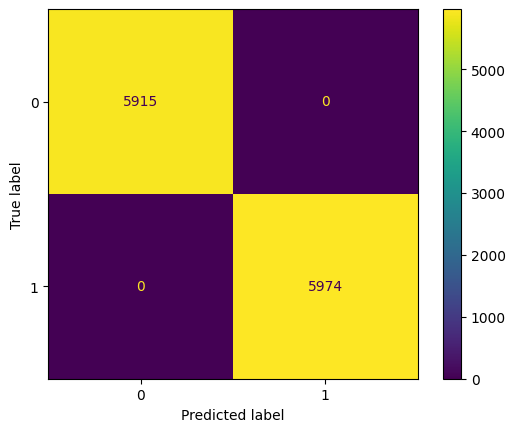

In [33]:
# Display the confusion matrix
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [34]:
# Accuracy score
print(accuracy_score(y_test, y_pred))

# Classification report
print(classification_report(y_test, y_pred))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5915
           1       1.00      1.00      1.00      5974

    accuracy                           1.00     11889
   macro avg       1.00      1.00      1.00     11889
weighted avg       1.00      1.00      1.00     11889



### 5. Ensemble Method

From the performance of all algorithms, we decided to choose 3 algorithm that have highest scores and relatively short training time:

* XGBoost
* Extreme Learning Machine
* Neural network (2 hidden layers)

Since each model will output a tensor of shape [None, 2] represent the probability of the sample belong to class 0 and class 1 respectively, our ensemble method simply calculate the average of 3 predicted probability.

In [35]:
# Read the dataset
data = pd.read_csv('Clean_Data.csv')

# Choose only features selected from Question 2
# Shuffle the data
data = data.sample(frac = 1)
data.head()

,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,status
35062,90145,2020-02-13 02:26:57,-0.012,8.408,8.394,-0.016,8.408,55.200,0.0375,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
38370,608705,2020-04-23 21:18:00,-0.014,8.780,8.768,-0.024,8.780,55.775,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
26434,906349,2020-06-07 09:26:25,7.322,7.890,-0.006,1.684,7.894,76.625,5.3200,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1
51877,1141691,2020-07-10 14:05:07,-0.008,9.042,9.026,-0.014,9.044,68.050,0.0375,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
38151,1107651,2020-07-05 00:14:26,-0.012,9.426,9.414,-0.018,9.428,67.750,3.7400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0


In [36]:
# Preprocessing the data
selected_features = ["TP2", "H1", "DV_pressure", "Reservoirs", "Oil_temperature", "Motor_current", "Oil_level", 'status']
X = data[selected_features]
y = data['status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
class EnsembleModel():

  def __init__(self, clfs = [], *args, **kwargs):
    self._clfs = clfs

  def fit(self, x, y):
    for c in self._clfs:
      c.fit(x,y)

  def predict(self, x):
    y_pred = self._clfs[0].predict(x)
    for c in self._clfs[1:]:
      y_pred += c.predict(x)
    return y_pred/len(self._clfs)


In [38]:
clf1 = NeuralNet()
clf2 = ExtremeLearningMachine(40)
clf3 = XGBoost()

ensembled = EnsembleModel(clfs = [clf1, clf2, clf3])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
ensembled.fit(X_train, y_train)

1487/1487 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9941 - loss: 0.0380 - learning_rate: 0.0010


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_accuracy` which is not available. Available metrics are: accuracy,loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


In [40]:
y_pred = ensembled.predict(X_test)

372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [41]:
y_pred = np.argmax(y_pred, axis = 1)

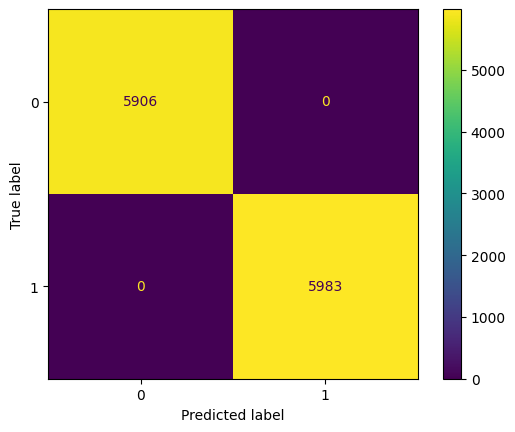

In [42]:
# Display the confusion matrix
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [43]:
# Accuracy score
print(f"Accuracy of Ensemble method {accuracy_score(y_test, y_pred)}")

# Classification report
print(classification_report(y_test, y_pred))

Accuracy of Ensemble method 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5906
           1       1.00      1.00      1.00      5983

    accuracy                           1.00     11889
   macro avg       1.00      1.00      1.00     11889
weighted avg       1.00      1.00      1.00     11889

